In [2]:
import numpy as np
import matplotlib.pyplot as plt

End of first integration: 25.009659999999162 2.2369999999998647 0.1 22.370000000000697


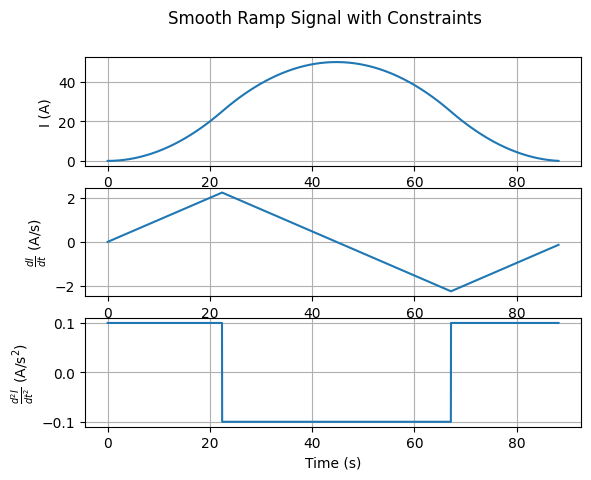

In [5]:
def generate_smooth_ramp_signal():
    dt = 0.01  # time step
    t = 0
    
    # Initialize signals
    SI = 0
    dSI_dt = 0
    d2SI_dt2 = 0.1

    # List to store the signal values
    l_SI = [SI]
    l_dSI_dt = [dSI_dt]
    l_d2SI_dt2 = [d2SI_dt2]
    l_t = [t]

    
    # Integrate dIdt2 until ignal reaches 25:
    while SI < 25:
        SI += dSI_dt * dt
        dSI_dt += d2SI_dt2 * dt
        t += dt

        l_SI.append(SI)
        l_dSI_dt.append(dSI_dt)
        l_d2SI_dt2.append(d2SI_dt2)
        l_t.append(t)

    print('End of first integration:', SI, dSI_dt, d2SI_dt2, t)

    # Keep integrating reversing second dev until SI reaches 50, and back to 25:
    d2SI_dt2 = -0.1
    while SI > 25:
        SI += dSI_dt * dt
        dSI_dt += d2SI_dt2 * dt
        t += dt

        l_SI.append(SI)
        l_dSI_dt.append(dSI_dt)
        l_d2SI_dt2.append(d2SI_dt2)
        l_t.append(t)

    # Now reverse the trend one last time
    d2SI_dt2 = +0.1
    while SI > 0 + 1e-6:
        SI += dSI_dt * dt
        dSI_dt += d2SI_dt2 * dt
        t += dt

        l_SI.append(SI)
        l_dSI_dt.append(dSI_dt)
        l_d2SI_dt2.append(d2SI_dt2)
        l_t.append(t)

    return l_t, l_SI, l_dSI_dt, l_d2SI_dt2
# Plot the generated signal
time, signal, first_derivative, second_derivative = generate_smooth_ramp_signal()

# Make three vertical subplots for each signal
fig, axs = plt.subplots(3, 1)
fig.suptitle('Smooth Ramp Signal with Constraints')
axs[0].plot(time, signal)
axs[0].set_ylabel('I (A)')
axs[0].grid(True)
axs[1].plot(time, first_derivative)
axs[1].set_ylabel(r'$\frac{dI}{dt}$ (A/s)')
axs[1].grid(True)
axs[2].plot(time, second_derivative)
axs[2].set_ylabel(r'$\frac{d^2I}{dt^2}$ (A/s$^2$)')
axs[2].grid(True)
plt.xlabel('Time (s)')
plt.show()


In [9]:
print('Signal length:', time[-1])

Signal length: 88.19000000000821


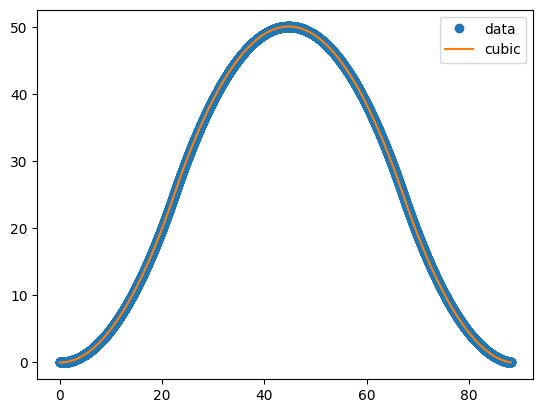

In [6]:
# Create a function by interpolating the signal
from scipy.interpolate import interp1d
f = interp1d(time, signal, kind='cubic')

# Plot the original signal and the interpolated function
time_fine = np.linspace(0, time[-1], 1000)
signal_fine = f(time_fine)

plt.plot(time, signal, 'o', time_fine, signal_fine, '-')
plt.legend(['data', 'cubic'], loc='best')
plt.show()